# APPLIED STATISTICS FINAL
## WALMART DATASET GUIDING QUESTIONS:
### 1) How do weekly sales vary across stores and departments?
### 2) Are there any factors from within the dataset that could be used to explain weekly sales?

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import thinkplot
import thinkstats2

from scipy import stats
import statsmodels.formula.api as smf

%matplotlib inline
sns.set()

In [53]:
stores_df = pd.read_csv('datasets/stores.csv')

#Read in data and convert date fields to datetime
train_df = pd.read_csv('datasets/train.csv', parse_dates=[2])
features_df = pd.read_csv('datasets/features.csv', parse_dates=[1])

##### Merge all the datasets together with light date processing


In [54]:
#MERGE ALL THREE DATASETS

merged_df = pd.merge(train_df, features_df)
merged_df = pd.merge(merged_df, stores_df)

def assign_quarters(row):
    if row['Date'].month <= 3:
        return 1
    elif row['Date'].month > 3 and row['Date'].month < 7:
        return 2
    elif row['Date'].month > 6 and row['Date'].month < 10:  
        return 3
    else:
        return 4

# Create additional date sub-fields for analysis
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['sales_month_and_year'] = merged_df['Date'].apply(lambda t: str(t.month)+"/"+str(t.year))
merged_df['sales_month'] = merged_df['Date'].apply(lambda t: str(t.month))
merged_df['sales_year'] = merged_df['Date'].apply(lambda t: str(t.year))
merged_df['quarters'] = merged_df.apply(assign_quarters, axis=1)

In [55]:
merged_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,sales_month_and_year,sales_month,sales_year,quarters
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2/2010,2,2010,1
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2/2010,2,2010,1


In [56]:
merged_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,quarters
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,2.482767
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,1.071341
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,2.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,2.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,3.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,4.000000


**Brief Description:** 

This dataset contains the weekly department sales of 45 Walmart stores.

The data is spread into 3 files, **stores.csv, features.csv and train.csv**.

The **stores.csv** file contains details about each individual stores size and type, the **train.csv** file contains the weekly sales for all the departments at the 45 stores, the date showing the week of purchase and also if the week had a holiday or not. Lastly we have the **features.csv** file that has the unemployment rate, temperature, fuel price and consumer price index for all the stores in the dataset.

There are other fields in this dataset but i wanted to list out the ones i focused on for analysis.


In [57]:
print('Total Unique Departments:',len(merged_df['Dept'].unique()))
print(merged_df['Dept'].unique())

Total Unique Departments: 81
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52 54 55
 56 58 59 60 67 71 72 74 79 80 81 82 83 85 87 90 91 92 93 94 95 97 98 78 96
 99 77 39 50 43 65]


In [58]:
print('Store Types:',merged_df['Type'].unique())

Store Types: ['A' 'B' 'C']


**Some Stats**

The date range of weekly sales provided in the dataset is of sales between 2010 and 2012.

There are a total of 81 unique department numbers in the dataset for walmart, ranging between values 1 and 99.

The maximum weekly sales value recorded in the dataset is **\$693,000.36**, with **75%** of all sales falling below **\$20,205**.

The average weekly sales for the dataset is recorded as **\$15,981.25** and the smallest weekly sales value is **$-4988.94**.

0.3% of the weekly sales in the entire dataset is below zero, rather than take them off, i will leave them there as they may be an indication that a department operated at a loss that week.

In [59]:
print(100* len(merged_df[merged_df['Weekly_Sales'] < 0])/len(merged_df),"% of values below zero, totaling:", len(merged_df[merged_df['Weekly_Sales'] < 0]), "values.")

0.30481296107408024 % of values below zero, totaling: 1285 values.


### DATASET EXPLORATION

##### Store Type and Sizes

In [60]:
for i,v in merged_df.groupby('Type'):
    print('Store Type:', i)
    print(v['Size'].describe())
    print()

Store Type: A
count    215478.000000
mean     182231.285486
std       41534.529330
min       39690.000000
25%      158114.000000
50%      202505.000000
75%      203819.000000
max      219622.000000
Name: Size, dtype: float64

Store Type: B
count    163495.000000
mean     101818.735827
std       30921.779415
min       34875.000000
25%       93188.000000
50%      114533.000000
75%      123737.000000
max      140167.000000
Name: Size, dtype: float64

Store Type: C
count    42597.000000
mean     40535.725286
std       1194.434302
min      39690.000000
25%      39690.000000
50%      39910.000000
75%      41062.000000
max      42988.000000
Name: Size, dtype: float64



Store Type: A Average Size: 182231.28548622134 sqft
Store Type: B Average Size: 101818.7358267837 sqft
Store Type: C Average Size: 40535.72528581825 sqft


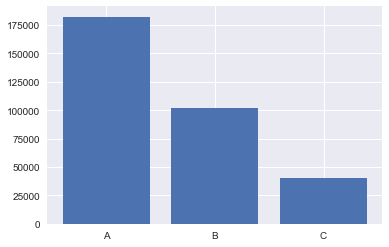

In [61]:
average_store_sizes = []
for i,v in merged_df.groupby('Type'):
    average_store_sizes.append([i, v['Size'].mean()])
    print('Store Type:', i, 'Average Size:', v['Size'].mean(), 'sqft')
average_store_sizes_df = pd.DataFrame(average_store_sizes)
average_store_sizes_df.columns = ['Store Type', 'Average Size']
plt.bar(average_store_sizes_df['Store Type'], average_store_sizes_df['Average Size'])
plt.show()

There are 3 types of walmart stores in this dataset (A, B, and C) and all 3 stores have different sizes as you can see from above, the store sizes are biggest for **type A** with an average size of **182231.28 sqft** and smallest for **type C** with **40535.73 sqft** and finally **type B** with a **101818.73 sqft**. 

On average stores of type A are larger than stores of type B by about **44%** and larger than stores of type C by about **78%**.

Because some stores are smaller than others, i assume that they may not have the same number of total departments as the bigger stores can afford more room for deparments because of their size.

Lets look at the department count of each store type to see if there are any missing.


In [62]:
for i,v in merged_df.groupby('Type'):
    print('Store type:', i, 'Total Departments:',len(v['Dept'].unique()))

Store type: A Total Departments: 81
Store type: B Total Departments: 80
Store type: C Total Departments: 66


Stores of **Type A and Type B** have similar counts of departments with **81 and 80** respectively, while stores of **Type C** which we know to have the smallest average size contain just **66** departments

Lets see if we can determing the important departments by looking at the departments that is common to all stores.

In [63]:
departments = []

for i, v in merged_df.groupby('Type'):
    departments.append(list(v['Dept'].unique()))
    #print('Store',i, v['Dept'].unique())

unique = set(departments[0]) & set(departments[1]) & set(departments[2])
print('The departments available at all walmart store types from the dataset \n',(unique))


The departments available at all walmart store types from the dataset 
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 38, 40, 41, 42, 44, 46, 49, 52, 55, 56, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}


Lets take a look at the total data points for each store type in order to understand their distribution in the dataset

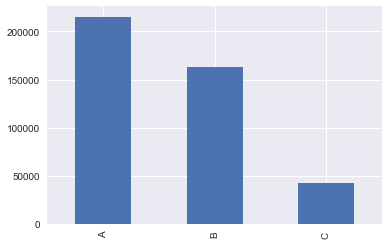

In [64]:
merged_df['Type'].value_counts().plot(kind='bar')

In [65]:
print('Percentage distributions:')
print(100*merged_df['Type'].value_counts() / len(merged_df))

Percentage distributions:
A    51.113220
B    38.782409
C    10.104372
Name: Type, dtype: float64


Stores of type A as we can see comprise more than half of the dataset meaning from this sample it is safe to assume that the majority of walmart stores are of **type A** 

##### Weekly Sales by store type

For this part i want to see what the weekly mean sales for each store type is, since the stores vary in size and department counts, i expect the weekly sales figures to reflect that also. However i am especially curios to see the disparity in sales between stores of **type A and type B**, they have different store sizes but similar department counts of **81 and 80** respectively.

474330.1
693099.36
112152.35


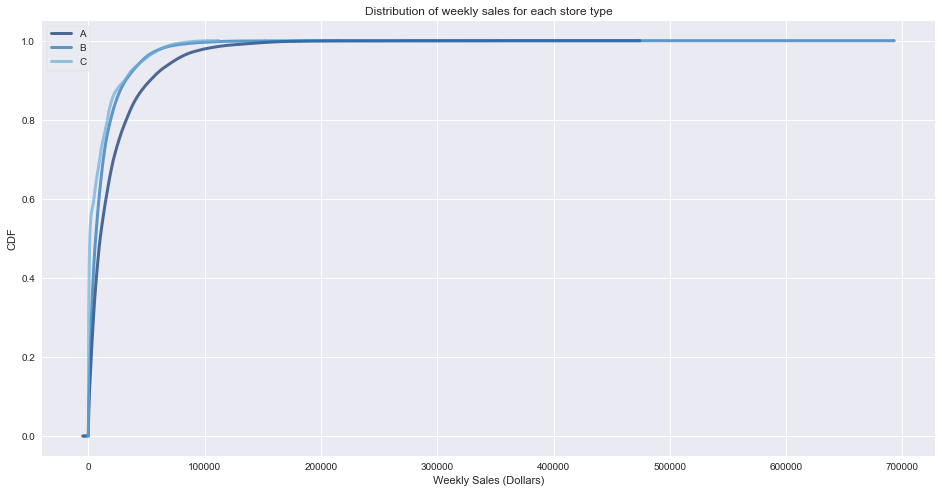

In [66]:
type_cdfs = []
for i,v in merged_df.groupby('Type'):
    cdf = thinkstats2.Cdf(v['Weekly_Sales'], label=str(i))
    print(v['Weekly_Sales'].max())
    type_cdfs.append(cdf)
    
plt.figure(figsize=(16,8))
thinkplot.PrePlot(3)
thinkplot.Cdfs(type_cdfs)
thinkplot.Config(title="Distribution of weekly sales for each store type", xlabel="Weekly Sales (Dollars)", ylabel='CDF')


From the distribution plot above for all 3 store types, it looks for about 40% of the sales, the 3 stores dont vary much in terms of weekly sales, but after that the weekly sales numbers of stores of type A start to increase. The weekly sales of stores of type B seem to be more similar to the weekly sales of type C stores even though type B stores have similar number of departments to type A stores.

Store Type: A Average Weekly Sales: 20099.56804290942 dollars
Store Type: B Average Weekly Sales: 12237.075976758137 dollars
Store Type: C Average Weekly Sales: 9519.532538441652 dollars


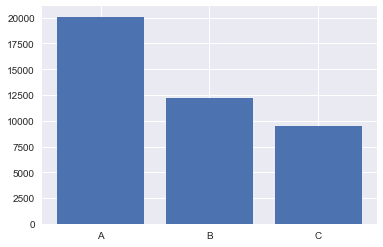

In [67]:
store_type_weekly_mean_sales = []
for i,v in merged_df.groupby('Type'):
    store_type_weekly_mean_sales.append([i, v['Weekly_Sales'].mean()])
    print('Store Type:', i, 'Average Weekly Sales:', v['Weekly_Sales'].mean(), 'dollars')
store_type_weekly_mean_sales_df = pd.DataFrame(store_type_weekly_mean_sales)
store_type_weekly_mean_sales_df.columns = ['Store Type', 'Average Weekly Sales']
plt.bar(store_type_weekly_mean_sales_df['Store Type'], store_type_weekly_mean_sales_df['Average Weekly Sales'])
plt.show()

Well as we can see, stores of **type A** have about **40%** more average weekly sales than stores of **type B** and **60%** more sales than stores of **type C**, which may mean that the larger walmart stores get more foot traffic and possibly more items per department since they have the size to accomodate more stock

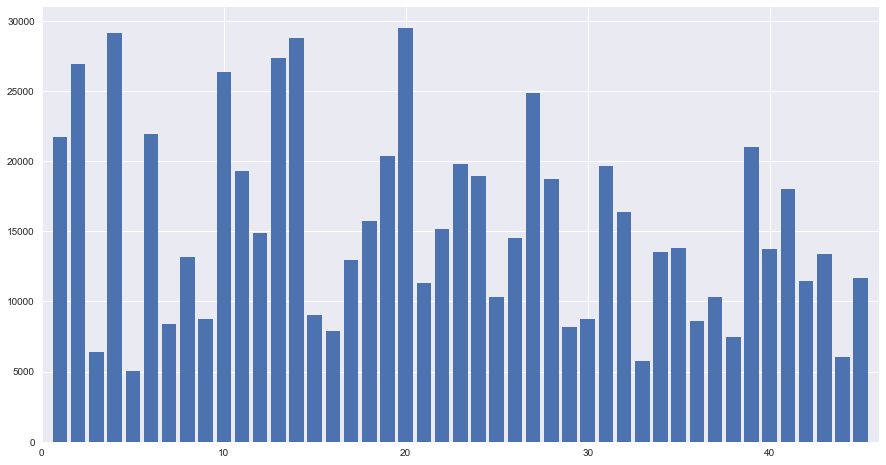

In [68]:
store_weekly_mean_sales = []
for i,v in merged_df.groupby('Store'):
    store_weekly_mean_sales.append([i, v['Weekly_Sales'].mean()])
    #print('Store:', i, 'Average Weekly Sales:', v['Weekly_Sales'].mean(), 'dollars')
store_weekly_mean_sales_df = pd.DataFrame(store_weekly_mean_sales)
store_weekly_mean_sales_df.columns = ['Store', 'Average Weekly Sales']
plt.figure(figsize=(15,8))
plt.xlim(0,46)
plt.bar(store_weekly_mean_sales_df['Store'], store_weekly_mean_sales_df['Average Weekly Sales'])

plt.show()

In [69]:
print(list(zip(list(stores_df['Store'].values), list(stores_df['Type'].values))))

[(1, 'A'), (2, 'A'), (3, 'B'), (4, 'A'), (5, 'B'), (6, 'A'), (7, 'B'), (8, 'A'), (9, 'B'), (10, 'B'), (11, 'A'), (12, 'B'), (13, 'A'), (14, 'A'), (15, 'B'), (16, 'B'), (17, 'B'), (18, 'B'), (19, 'A'), (20, 'A'), (21, 'B'), (22, 'B'), (23, 'B'), (24, 'A'), (25, 'B'), (26, 'A'), (27, 'A'), (28, 'A'), (29, 'B'), (30, 'C'), (31, 'A'), (32, 'A'), (33, 'A'), (34, 'A'), (35, 'B'), (36, 'A'), (37, 'C'), (38, 'C'), (39, 'A'), (40, 'A'), (41, 'A'), (42, 'C'), (43, 'C'), (44, 'C'), (45, 'B')]


From the plot we can see that the maximum average weekly sales is recorded by store **20** which is of **type A** and the store with the smallest average sales is store **5** which is of type **b**. I was expecting to see **type C** 

Now lets look at the performance of the different departments by store and store type. For this i want to find the best performing departments for the different store types and the best performing departments for the different stores.

My thinking here is that even though the the weekly sales by store types vary differently, there should be similarities in how the top departments perform across all the different stores. 

I will start with the top performing departments by store type and then proceed to checking the top performing departments by store number.

In [70]:
"""
i = type
j = dept
"""

type_max_sales_dept = []
## group stores by type
for i, v in merged_df.groupby('Type'):
## group each store type by departments
    dept_means = []
    for j, vv in v.groupby('Dept'):
    ## calculate the mean weekly sales of each department
        dept_means.append((i, j, vv['Weekly_Sales'].mean()))
    most_sales = max(dept_means, key=lambda item:item[2])
    type_max_sales_dept.append(most_sales)

type_max_sales_dept    


[('A', 92, 112156.88166242845),
 ('B', 38, 58301.16771698895),
 ('C', 92, 60795.75937062942)]

It seems that stores of **type A** and stores of **types C** have similar departments (**92**) with the highest weekly sales figures while stores of **type B** best performing department in terms of weekly sales is (**38**).

Now lets check for the best performing departments across all the stores.

For this i will calculate the average weekly sales of each stores department and pick the biggest from every store and then tally all of the together to see the most frequent.


In [71]:
stores_grouped = merged_df.groupby('Store')
store_dept_weekly_means = []

store_dept_stores = []
store_dept_dept = []
store_dept_mean_sales = []
store_type = []
for i, v in stores_grouped:
    curr = []
    for j, k in v.groupby('Dept'):
        curr.append((i,j,k['Weekly_Sales'].mean(), k['Type']))
    most_sales = max(curr, key=lambda item:item[2])
    store_dept_weekly_means.append((most_sales[0], most_sales[1], most_sales[2], most_sales[3]))    
    store_dept_stores.append(most_sales[0])
    store_dept_dept.append(most_sales[1])
    store_dept_mean_sales.append(most_sales[2])
    store_type.append(most_sales[3])
    curr=[]
    
# plt.figure(figsize=(14,8))
# plt.xlim(1,45)
# plt.bar(store_dept_stores, store_dept_dept)
import collections
best_performing_depts = dict(collections.Counter(store_dept_dept))


for i, v in best_performing_depts.items():
    print('Department:',i,'Total Stores:',v)

Department: 92 Total Stores: 19
Department: 38 Total Stores: 16
Department: 72 Total Stores: 4
Department: 95 Total Stores: 3
Department: 2 Total Stores: 2
Department: 94 Total Stores: 1


From the output we can see that the best performing departments when the dataset is grouped by stores are **92,38,72,95,2,94** (sorted in descending order)

If we compare to the output we got when the dataset was grouped by store type, we can see that 2 departments stand out **92 and 38** which leads me too believe that those are the best performing departments across all the walmart stores on average.

### Holiday and Non-holiday sales comparisons 

Up until now we have look at the weekly sales by store type, department and the individual stores as a whole. 

For this section i am going to investigate how the sales figures for each store, department and store type changes during holiday and non-holiday periods.

My assumption here is that the weekly sales for the holiday periods should be more than during non-holiday periods simply because there are alot of promotions during these periods in general by stores such as walmart specifically designed to increase sales during those periods.

Holiday= False Max Sales: 406988.63
Holiday= False average Sales: 15901.445069008503
Holiday= True Max Sales: 693099.36
Holiday= True average Sales: 17035.823187350474


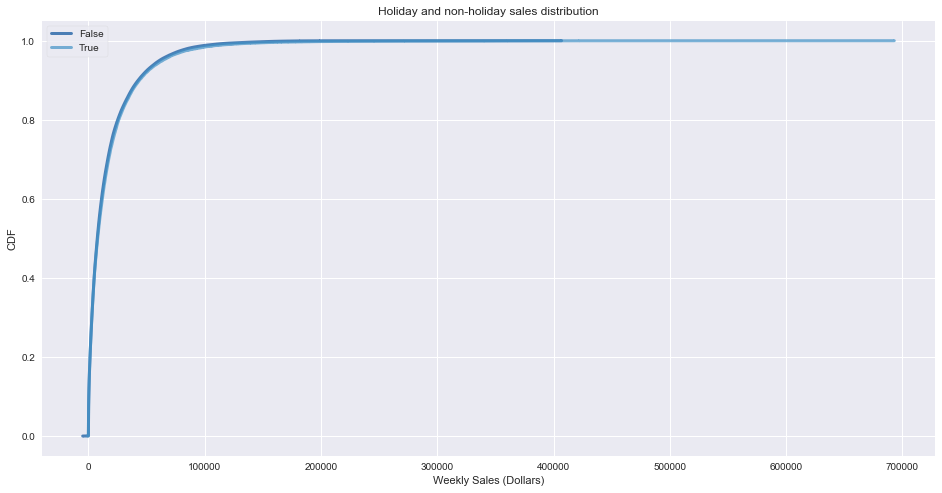

In [72]:
hol_nonhol_cdfs = []

for i,v in merged_df.groupby('IsHoliday'):
    cdf = thinkstats2.Cdf(v['Weekly_Sales'], label=str(i))
    print('Holiday=',i,'Max Sales:',v['Weekly_Sales'].max())
    print('Holiday=',i,'average Sales:',v['Weekly_Sales'].mean())

    hol_nonhol_cdfs.append(cdf)
    
plt.figure(figsize=(16,8))
thinkplot.PrePlot(2)
thinkplot.Cdfs(hol_nonhol_cdfs)
thinkplot.Config(title="Holiday and non-holiday sales distribution", xlabel="Weekly Sales (Dollars)", ylabel='CDF')

From the distribution plot, there doesnt seem to be any significant difference in sales for holiday and non-holiday periods, if anything it can be said that sales during non-holiday periods are slightly better than those of holiday periods when all the stores are looked at together.

However the print outs of average and maximum weekly sales for holiday periods shows that there is an increase.

Maximum weekly sales shows and increase of **\$286,111**
Average weekly sales shows an increase of **\$1134**

lets see how that changes when we decide to evaluate holiday sales by store type 

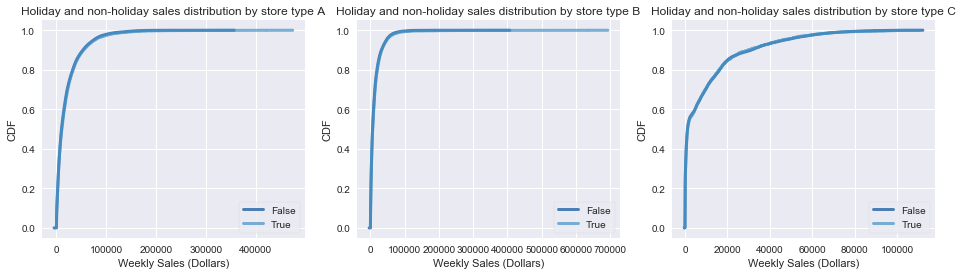

In [73]:
type_a_cdf = []
type_b_cdf = []
type_c_cdf = []
for j, vv in merged_df.groupby('Type'):
    for i,v in vv.groupby('IsHoliday'):
        cdf = thinkstats2.Cdf(v['Weekly_Sales'], label=str(i))
        if j == 'A':
            type_a_cdf.append(cdf)
        elif j == 'B':
            type_b_cdf.append(cdf)
        elif j == 'C':
            type_c_cdf.append(cdf)     
            
plt.figure(figsize=(16,4))
thinkplot.subplot(1,1,3)
thinkplot.PrePlot(2)
thinkplot.Cdfs(type_a_cdf)
thinkplot.Config(title="Holiday and non-holiday sales distribution by store type A", xlabel="Weekly Sales (Dollars)", ylabel='CDF')

thinkplot.subplot(2,1,3)
thinkplot.PrePlot(2)
thinkplot.Cdfs(type_b_cdf)
thinkplot.Config(title="Holiday and non-holiday sales distribution by store type B", xlabel="Weekly Sales (Dollars)", ylabel='CDF')

thinkplot.subplot(3,1,3)
thinkplot.PrePlot(2)
thinkplot.Cdfs(type_c_cdf)
thinkplot.Config(title="Holiday and non-holiday sales distribution by store type C", xlabel="Weekly Sales (Dollars)", ylabel='CDF')

plt.show()


From the CDF plots of the 3 store types, we see that the sales dont change noticable for holiday and nono-holiday periods.

Now lets check by departments. The number of walmart store departments are alot and plotting all of them to see on a graph will just display alot of noise. To make for a better plot, i will only plot the best performing store departments we extracted earlier **(92 and 38)** 

293966.05
238066.17


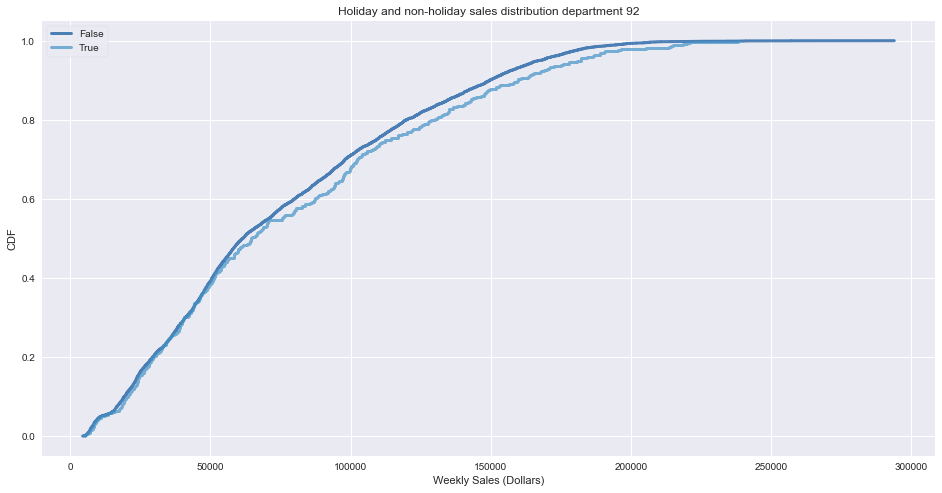

In [74]:
dept_92 = merged_df[merged_df['Dept'] == 92]
dept_38 = merged_df[merged_df['Dept'] == 38]


dept_92_cdfs = []

for i,v in dept_92.groupby('IsHoliday'):
    cdf = thinkstats2.Cdf(v['Weekly_Sales'], label=str(i))
    print(v['Weekly_Sales'].max())
    dept_92_cdfs.append(cdf)
    
plt.figure(figsize=(16,8))
thinkplot.PrePlot(2)
thinkplot.Cdfs(dept_92_cdfs)
thinkplot.Config(title="Holiday and non-holiday sales distribution department 92", xlabel="Weekly Sales (Dollars)", ylabel='CDF')


172794.2
129054.64


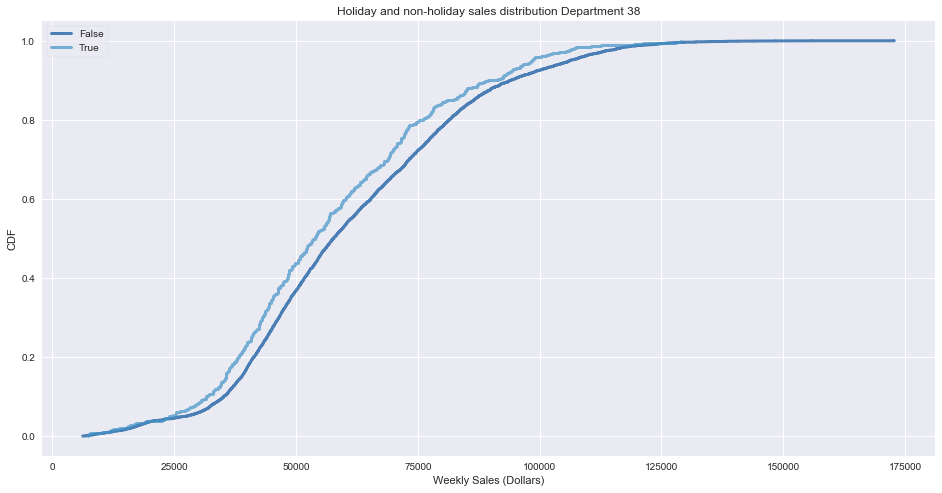

In [75]:
dept_38_cdfs = []

for i,v in dept_38.groupby('IsHoliday'):
    cdf = thinkstats2.Cdf(v['Weekly_Sales'], label=str(i))
    print(v['Weekly_Sales'].max())
    dept_38_cdfs.append(cdf)
    
plt.figure(figsize=(16,8))
thinkplot.PrePlot(2)
thinkplot.Cdfs(dept_38_cdfs)
thinkplot.Config(title="Holiday and non-holiday sales distribution Department 38", xlabel="Weekly Sales (Dollars)", ylabel='CDF')


Its inteesting to see from the two plots of the top performing departments **92 and 38** that department **92's** holiday weekly sales numbers don't outperform the non-holiday weekly sales but that fact is opposite when department **38** is looked at. The weekly sales for the holidays for that department are mostly better than the non-holiday sales. They start off the same for about the first 5 percent of values and then the holiday sale just create a distinction.

#### Yearly, Monthly and Quarterly Sales

For this section i am going to view the weekly sales on a yearly, monthly and quarterly basis, this will enable me see the store years, months and seasons (quarters) that have the most weekly sales from the whole dataset.

Lets start withthe yearly sales

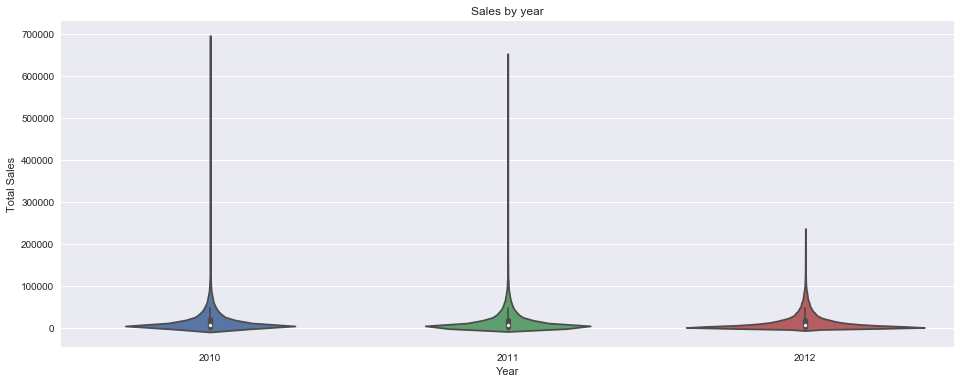

In [76]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

sns.violinplot(x="sales_year", y="Weekly_Sales", data=merged_df, ax=ax)

ax.set_title('Sales by year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
#ax.set_xticklabels(months)

plt.show()

From the violin plot it seems that the year of 2010, sales reached a peak of almost **\$700000**,  more than other years. It also seems that although sales in 2010 didn't reach the peak height of the other years, it accumulated alot of weekly sales below **\$100000**, more than the other 2 years

Also the density displayed shows that the bulk of weekly sales values for all 3 years fall within similar probable ranges

Lets check out the monthly sales

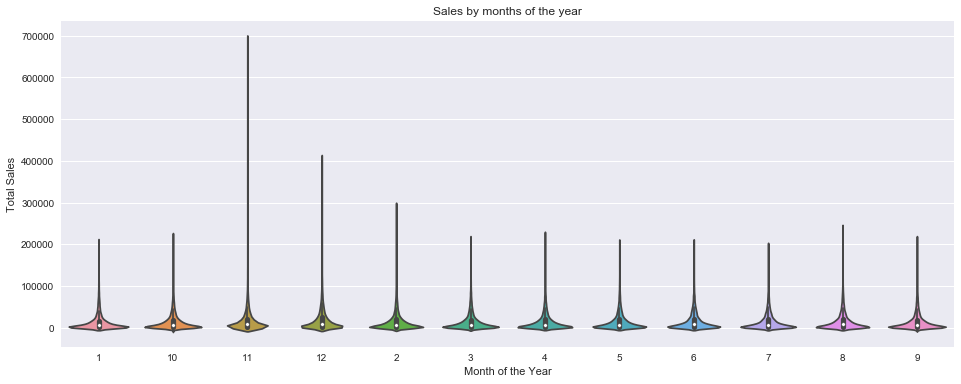

In [77]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

sns.violinplot(x="sales_month", y="Weekly_Sales", data=merged_df, ax=ax)

ax.set_title('Sales by months of the year')
ax.set_xlabel('Month of the Year')
ax.set_ylabel('Total Sales')
#ax.set_xticklabels(months)

plt.show()

For the monthly sales, it seems that the peak weekly sales figure we noticed when plotting the years (2010) occured in the month of November and the second highest weekly sales figures are in December. 

This ties in nicely with the fact that those are periods leading up to the holidays with alot of sales events and promotions like **black friday, cybermonday etc ..**. 

There are other light peaks seen for the months of August and September which are the middle to end summer periods and also February which i still havent come up with a hypothesis as to why.

Also aside from the months of November and December who have skinnier densities, the weekly sales for the remaining months seem to fall in a similar probable range.



**Lets check out the how the sales look if broken down into quarters**

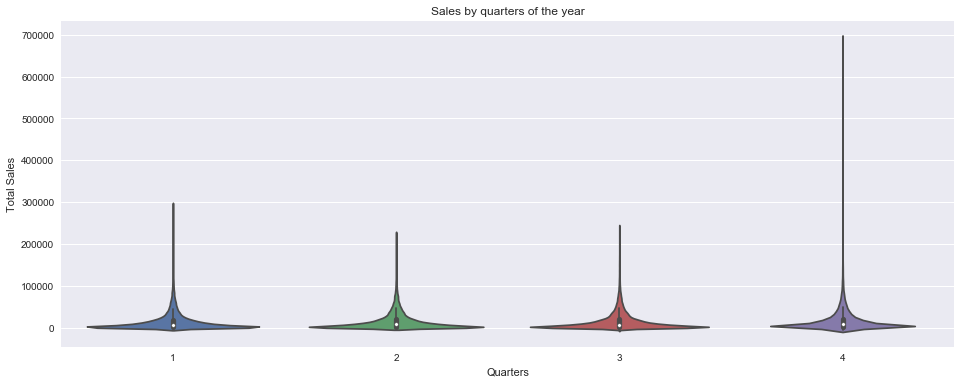

In [78]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

sns.violinplot(x="quarters", y="Weekly_Sales", data=merged_df, ax=ax)

ax.set_title('Sales by quarters of the year')
ax.set_xlabel('Quarters')
ax.set_ylabel('Total Sales')
#ax.set_xticklabels(months)

plt.show()

The quarterly sales show us similar information we got from the monthly plots. Quarter 4 which contains the months of Novermber and December has the higest peak sales just like we saw in the weekly sales by month plot. The all have similar densities with quarter 4 being a bit skinnier indicating an increased range of probable values.

### VARIABLE RELATIONSHIPS, HYPOTHESIS TESTING AND REGRESSION

For this section i am going to check the relationships between some of the variables, run some hypothesis tests to confirm or reject some of my earlier hypothesis about weekly sales and create some regression models to show relationship (if any) between some of the variables.

**Lets start with relationship between temperature and Weekly sales**

In [79]:
sample_scatter = thinkstats2.SampleRows(merged_df, 5000) 
scat_temp, scat_sales, scat_unemp, scat_fuel, scat_cpi = sample_scatter.Temperature, sample_scatter.Weekly_Sales, sample_scatter.Unemployment, sample_scatter.Fuel_Price, sample_scatter.CPI 

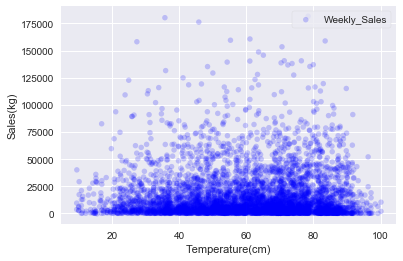

In [80]:
thinkplot.Scatter(scat_temp, scat_sales)
thinkplot.Show(xlabel='Temperature(cm)', ylabel='Sales(kg)')

From the plot above, it seems there can be a  relationship between the Temperature and Weekly sales but its not very clear. When the temperature values are at their extremes(very hot and very cold), we see lesser weekly sales data points, suggesting that people shop less during those periods.

The data seems to be most concentrated around 70F

Lets do similar analysis for fuel price, unemployment rate and consumer price index

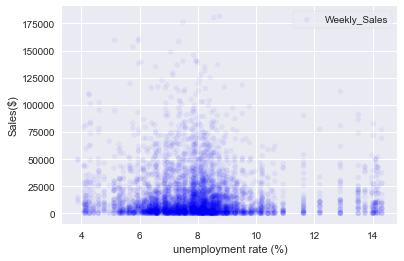

In [81]:
thinkplot.Scatter(scat_unemp, scat_sales, alpha=0.05)
thinkplot.Show(xlabel='unemployment rate (%)', ylabel='Sales($)')

The unemployment rate plot looks interesting. For the values we have available in the dataset, the weekly sales of stores with unemployment rate at about 8% seem to achieve the best numbers in terms of sales. The relation ship between the unemployment rate and weekly sales seem to form a bell curve shape starting at about 5% and ending at approximately 11%

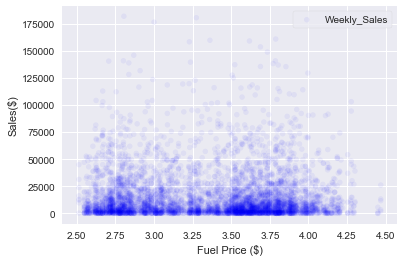

In [82]:
thinkplot.Scatter(scat_fuel, scat_sales, alpha=0.05)
thinkplot.Show(xlabel='Fuel Price ($)', ylabel='Sales($)')

I cant tell much from the plot for fuel price there seems to be a slight relationship but i cannot place it.

Lets plot the percentiles and see if we get a different view of the relationships

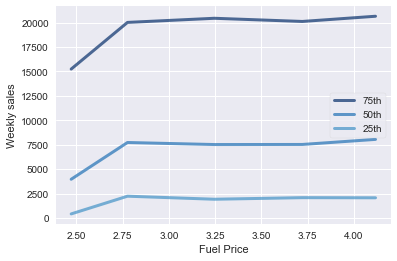

In [83]:
to_use = merged_df.dropna(subset=['Fuel_Price','Weekly_Sales'])
bins = np.arange(1,5,0.5)
indices = np.digitize(to_use.Fuel_Price, bins)
groups = to_use.groupby(indices)

mean_fuel = [group.Fuel_Price.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.Weekly_Sales) for i, group in groups]

for percent in [75,50,25]:
    sales_perc = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_fuel, sales_perc, label=label)
    
thinkplot.Config(xlabel='Fuel Price', ylabel='Weekly sales')

the plot shows that the relationship between fuel price and weekly sales starts off linear but immediately becomes more even from about 2.76 till 3.75 where it rises again slightly.

So when the fuel price is approximately between 2.75 and 3.75 there is no clear relationship, values are pretty much flat indicating that there is no clear relationship between fuel price and weekly sales.

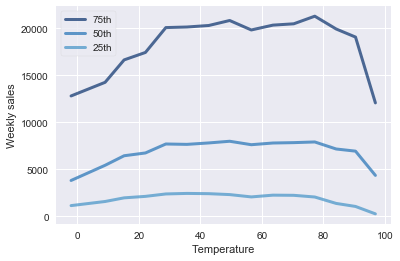

In [84]:
to_use = merged_df.dropna(subset=['Temperature','Weekly_Sales'])
bins = np.arange(-3,100,7)
indices = np.digitize(to_use.Temperature, bins)
groups = to_use.groupby(indices)

mean_fuel = [group.Temperature.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.Weekly_Sales) for i, group in groups]

for percent in [75,50,25]:
    sales_perc = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_fuel, sales_perc, label=label)
    
thinkplot.Config(xlabel='Temperature', ylabel='Weekly sales')

The temperature plot mostly starts off with a relationship that seems linear but as the temperature increases, the weekly sales resemble more of horizontal line before dropping off sharply towards the end. 

This supports the earlier scatter plot which had fewer weekly sales values at the extremes of temperature and more in th middle

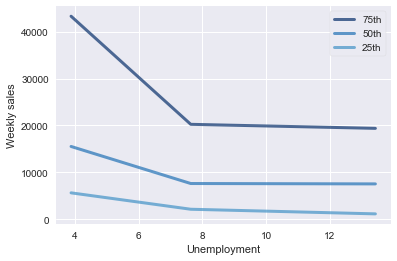

In [85]:
to_use = merged_df.dropna(subset=['Unemployment','Weekly_Sales'])
bins = np.arange(-3,100,7)
indices = np.digitize(to_use.Unemployment, bins)
groups = to_use.groupby(indices)

mean_fuel = [group.Unemployment.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.Weekly_Sales) for i, group in groups]

for percent in [75,50,25]:
    sales_perc = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_fuel, sales_perc, label=label)
    
thinkplot.Config(xlabel='Unemployment', ylabel='Weekly sales')

I think the unemployment rate shows the best correlation using percentiles. We can see that as the unemployment rate increases the weekly sales drops linearly between values 4 and 7.5. 

This shows that there is some relationship between unemployemnt rate of a stores location and weekly sales of that store

#### Some hypothesis testing

For this section i want to run some hypothesis tests that will contribute to what we already know about the relationship between variables

I will run a hypothesis test using the difference in means of weekly sales for holiday and non holiday periods to confirm if weekly sales are more during the holidays and also test the correlations of values like temperature and unemployment rate to weekly sales 



In [86]:
"""
    This code was taken from the Thinkstats2 Text book
"""

class DiffWeeklySalesMeansPermute(thinkstats2.HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.
        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.
        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    
class DiffWeeklySalesStdPermute(thinkstats2.HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.
        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.std() - group2.std())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.
        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    


In [87]:
hols_non_hols = {}

for i,v in merged_df.groupby('IsHoliday'):
    hols_non_hols[i] = v
    
holiday_sales = hols_non_hols[True]['Weekly_Sales']
non_holiday_sales = hols_non_hols[False]['Weekly_Sales']
holiday_data = holiday_sales, non_holiday_sales

Lets test the main hypothesis of if weekly sales for holiday and non-holiday periods vary.

P Values: 0.0
Actual: 1134.3781183419705 Largest from simulation 470.24522231


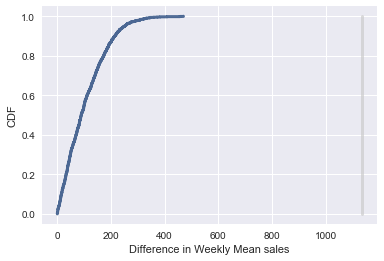

In [88]:
ht = DiffWeeklySalesMeansPermute(holiday_data)
print("P Values:",ht.PValue())
ht.PlotCdf()
thinkplot.Config(xlabel='Difference in Weekly Mean sales',
                   ylabel='CDF')
print('Actual:', ht.actual, 'Largest from simulation',  ht.MaxTestStat())

When running hypothesis tests, if the effect(p-value) is less than 5%, it is considered significant and not a scenario that can happen by chance.

For difference in weekly sales means for holiday and non-holiday periods as a test statistic, we see that the P-Value is below 5% meaning its statistically significant, also the larget value from the simulation wasnt up to the actual which means that the effect does not happen by chance 

Lets do one more hypothesis test to see if the unemployment rate is correlated to the weekly sales.

P Values: 0.0
Actual: 2.58637164998 % Largest from simulation 0.618413407192 %


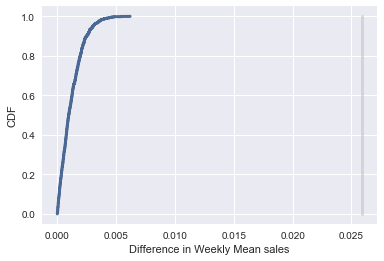

In [89]:
selected = merged_df.dropna(subset=['Unemployment', 'Weekly_Sales'])
data = selected.Unemployment.values, selected.Weekly_Sales.values
ht3 = CorrelationPermute(data)
print("P Values:",ht3.PValue())
ht3.PlotCdf()
thinkplot.Config(xlabel='Difference in Weekly Mean sales',
                   ylabel='CDF')
print('Actual:',100* ht3.actual, '% Largest from simulation',  ht3.MaxTestStat()*100, '%')

For this hypothesis test also we get similar results. The pValue is 0 meaning the correlation between unemployment rate and Weekly sales is statistically significant, and the largest value from the simulation isnt even up to half of the actual.

P Values: 0.136
Actual: 0.231244701026 % Largest from simulation 0.53045511178 %


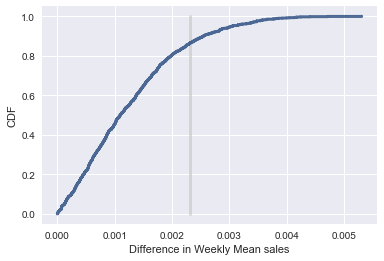

In [90]:
selected = merged_df.dropna(subset=['Temperature', 'Weekly_Sales'])
data = selected.Temperature.values, selected.Weekly_Sales.values
ht3 = CorrelationPermute(data)
print("P Values:",ht3.PValue())
ht3.PlotCdf()
thinkplot.Config(xlabel='Difference in Weekly Mean sales',
                   ylabel='CDF')
print('Actual:',100* ht3.actual, '% Largest from simulation',  ht3.MaxTestStat()*100, '%')

For the temparature however, we get a P value of 14% which is greater than 5% meaning that its not statistically significant, plus we achieved a value higher than the actual from the simulation which means that the effect can occur by chance validating the null hypothesis that Temperature has no correlation to weekly sales

### LEAST SQUARES

For this part, i want to use linear least squares model to fit the unemployment and weekly sales data in order to understand the relationship between the variables much better.

In [91]:
inter, slope = thinkstats2.LeastSquares(merged_df['Unemployment'], merged_df['Weekly_Sales'])
print('Intercept:',inter,'Slope:', slope)

Intercept: 18490.7029741 Slope: -315.245457405


With a slope **-315**, it means the weekly sales decline by **-$315.25** for every increase in unemployment. This can be used to roughly estimate sales data for unemployment rates not included in the dataset just like i did below for employment rate of **30**

In [92]:
print('Rough estimate of weekly sales for unemployment rate at 30 is ','$'+str(inter + slope * 30))

Rough estimate of weekly sales for unemployment rate at 30 is  $9033.33925194


Lets show this using a Plot

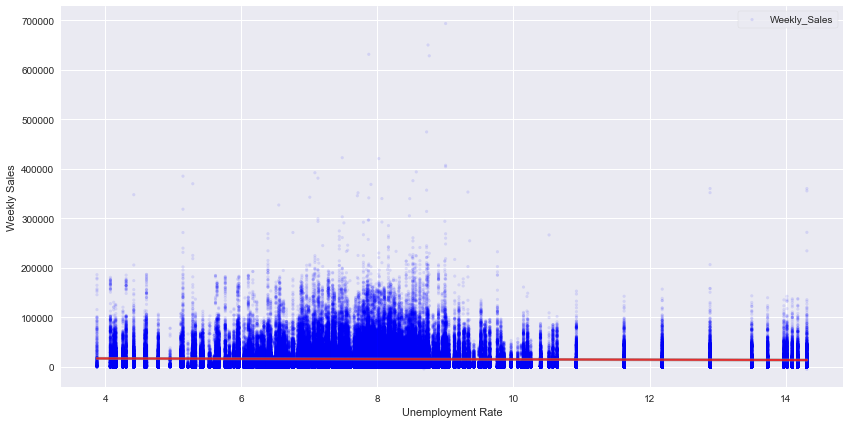

In [93]:
fit_xs, fit_ys = thinkstats2.FitLine(merged_df['Unemployment'], inter, slope)
plt.figure(figsize=(14,7))
thinkplot.Scatter(merged_df['Unemployment'], merged_df['Weekly_Sales'], color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='gray', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Unemployment Rate",
                 ylabel='Weekly Sales',
                 legend=True)

its not very clear from the plot but the slope has a negative correlation 

### REGRESSION

For this part i want to see if i can use regression analysis to describe the relationship between the dependent and independent variables.

In previous sections we used Unemployment rate as an explanatory variable to predict weekly sales as a dependent variable. 

Simple regression works with one dependent and one independent variable and multiple regression uses multiple independent variables

Lets start with simple regressions

In [94]:
formula = 'Weekly_Sales ~ Unemployment'
model = smf.ols(formula, data=merged_df)
results = model.fit()

In [95]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     282.2
Date:                Tue, 19 Dec 2017   Prob (F-statistic):           2.63e-63
Time:                        15:15:20   Log-Likelihood:            -4.8266e+06
No. Observations:              421570   AIC:                         9.653e+06
Df Residuals:                  421568   BIC:                         9.653e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.849e+04    153.423    120.521      0.000    1.82e+04    1.88e+04
Unemployment  -315.2455     18.766    -16.798      0.000    -352.027    -278.464
==============================================================================
Omnibus:                   310448.534   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8864244.049
Skew:                           3.259   Prob(JB):                         0.00
Kurtosis:                      24.498   Cond. No.                         36.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
results.pvalues

Intercept       0.000000e+00
Unemployment    2.625560e-63
dtype: float64

In [97]:
np.std(results.resid)

22703.559204189296

In [98]:
np.std(merged_df['Weekly_Sales'])

22711.15658271489

Low R-squared value indicating low predictive power for the model on the data however the p-value is 2.625560e-63, indicating that the slope is statistically significant. The p-value for the model itself is 2.63e-63, which also indicates significance

Lets do a multiple regression using unemployments rate and Temperature as predictors

In [99]:
formula = 'Weekly_Sales ~ Unemployment + CPI'
model = smf.ols(formula, data=merged_df)
results = model.fit()

In [100]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     332.0
Date:                Tue, 19 Dec 2017   Prob (F-statistic):          8.20e-145
Time:                        15:15:20   Log-Likelihood:            -4.8265e+06
No. Observations:              421570   AIC:                         9.653e+06
Df Residuals:                  421567   BIC:                         9.653e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.254e+04    257.722     87.447      0.000     2.2e+04     2.3e+04
Unemployment  -430.4644     19.663    -21.892      0.000    -469.004    -391.925
CPI            -18.2775      0.936    -19.535      0.000     -20.111     -16.444
==============================================================================
Omnibus:                   310529.843   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8867740.484
Skew:                           3.261   Prob(JB):                         0.00
Kurtosis:                      24.501   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
results.pvalues

Intercept        0.000000e+00
Unemployment    3.563882e-106
CPI              6.026585e-85
dtype: float64

Here we see again that the R-squared value is low and the models p value is statistically significant, also the p-value for CPI and unemployment rate are both very low which indicates significance.

### CONCLUSION

**Weekly Sales Variarion**

In the data we saw that stores are grouped by type, the type represents their size range and that has an effect on weekly sales. For example the stores of type A record higer weekly sales figures on average that stores of type b and type c, plus the type a stores have more departments that the other store sizes which could be part of the reason for more sales.

When we looked at the sales by store also we saw that on average store 20 which is of type A rcorded the most weekly sales making it the best performing store from the dataset. 
It is also believed from the dataset that although store size may contribute to the store achieving higher weekly sales figures, that is not always the case as the worst performing store from the dataset was store 5 which is of type B.

We also saw that the best months of weekly sales from the dataset are in November and December which are monnths full of holidays and sales events.

Also out of the 81 departments in the dataset, 66 of them are common to all the store types and among those 66, there are 2 stand out performers in terms of weekly sales which are departments 38 and 92. When the holiday and non-holiday sales for these departments are plotted, we saw that holiday sales were better for department 38 while the opposite was true for department 92. Because of lack of additional data about the departments, my conclusion on that is department 38 may just be more popular during the holidays than department 92 is.

The holiday and non-holiday sales for the different store types however didn't show any clear differenc when the distribution was plotted so for now its best to say there isnt noticeable change.


**Factors that may affect weekly sales**

To check for factors that may affect the weekly sales of the stores i looked to running hypotheses tests and regression models as a way to tell.

From the results we saw that Unemployment rate and CPI(Consumer price index) together with their models all had low PValues making them statistically significant although the models had low R-squared values signifying low predictive power. 